# Table Extraction and OCR with OpenCV, PaddleOCR, and VietOCR

This notebook demonstrates how to:
1. Detect table structures using OpenCV
2. Detect text regions using PaddleOCR
3. Recognize text using VietOCR

## Import Libraries

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from vietocr.vietocr.tool.predictor import Predictor
from vietocr.vietocr.tool.config import Cfg
from PaddleOCR import PaddleOCR

# Import our table_ocr module
from table_ocr import extract_table, init_models

## Initialize Models

In [24]:
# Initialize PaddleOCR and VietOCR models
recognitor, detector = init_models()

print("Models initialized successfully!")

Model weight /var/folders/zt/wcb31_zn5sqf6t7yyknhkl6r0000gn/T/vgg_transformer.pth exsits. Ignore download!
[2025/05/16 21:39:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/rec/latin/l

## Process a Sample Image

In [53]:
# Path to your table image
img_path = 'samples/image.png'  # Update with your image path

# Output directory
output_dir = './output/table_extraction'

Image found: samples/image.png


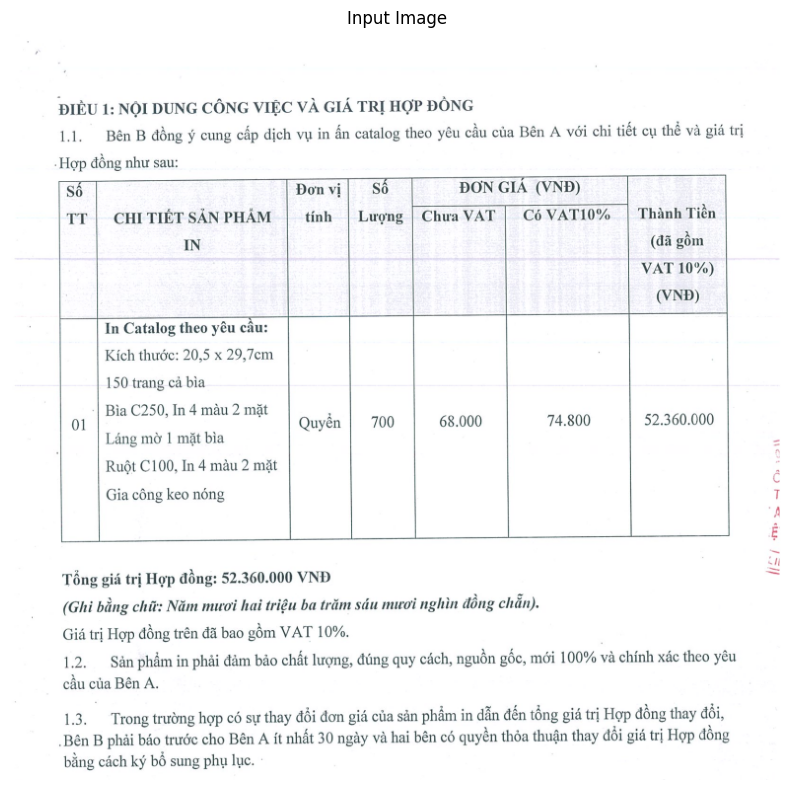

In [54]:
# Check if image exists
if os.path.exists(img_path):
    print(f"Image found: {img_path}")
    # Display the image
    plt.figure(figsize=(10, 10))
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()
else:
    print(f"Image not found: {img_path}")

## Extract Table and Recognize Text

In [55]:
# Extract tables with enhanced factor of 2.0
table_data, result_img_path = extract_table(img_path, output_dir, factor=2.0)

Model weight /var/folders/zt/wcb31_zn5sqf6t7yyknhkl6r0000gn/T/vgg_transformer.pth exsits. Ignore download!
[2025/05/17 17:46:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/rec/latin/l

## Display Results

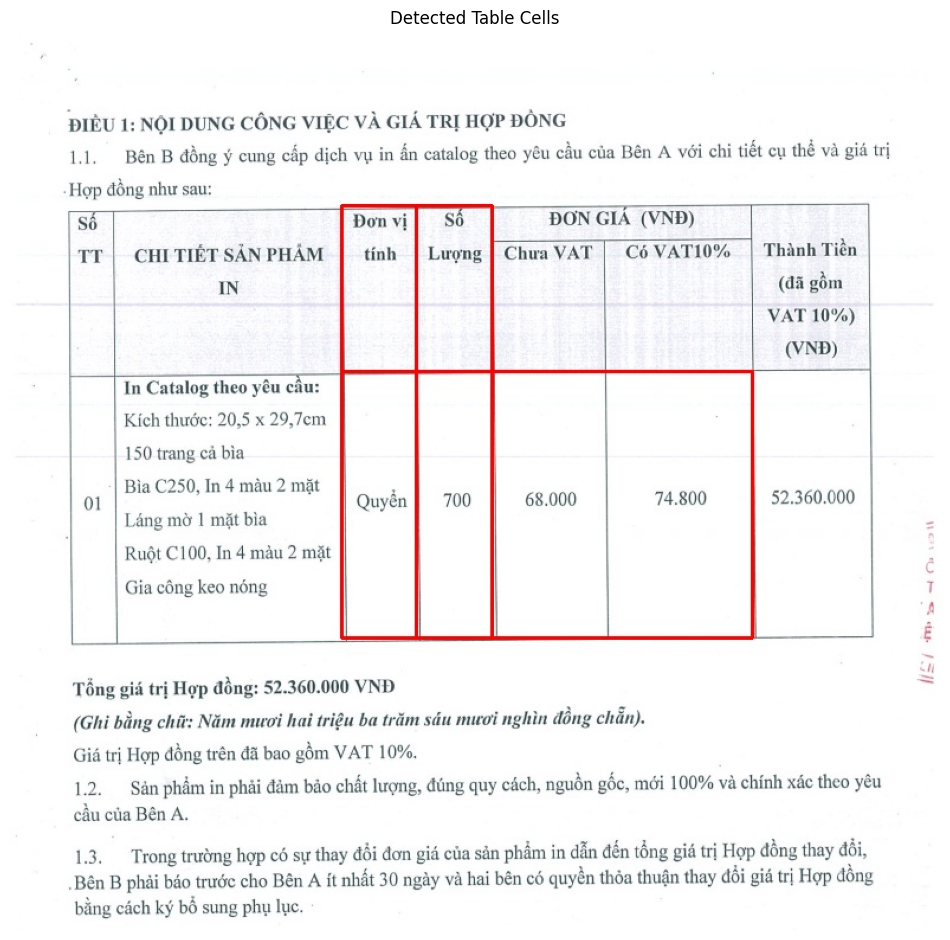

In [56]:
if result_img_path and os.path.exists(result_img_path):
    # Display result image
    plt.figure(figsize=(12, 12))
    result_img = cv2.imread(result_img_path)
    result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    plt.imshow(result_img_rgb)
    plt.title("Detected Table Cells")
    plt.axis('off')
    plt.show()

In [52]:
# Display extracted text data
if table_data:
    print(f"Found {len(table_data)} cells in the table.\n")
    
    # Create a simple visualization of the table content
    for cell_data in table_data:
        print(f"Cell ID: {cell_data['cell_id']}")
        print(f"Position: {cell_data['position']}")
        print(f"Text: {cell_data['text']}")
        print("-" * 50)

Found 25 cells in the table.

Cell ID: 0
Position: [207, 1192, 339, 1362]
Text: STT
--------------------------------------------------
Cell ID: 1
Position: [335, 1192, 934, 1362]
Text: Chủng loại hàng hóa
--------------------------------------------------
Cell ID: 2
Position: [930, 1192, 1275, 1281]
Text: Số lượng
--------------------------------------------------
Cell ID: 3
Position: [1271, 1192, 1446, 1219]
Text: propores
--------------------------------------------------
Cell ID: 4
Position: [1442, 1192, 1769, 1219]
Text: CONTEs
--------------------------------------------------
Cell ID: 5
Position: [1765, 1192, 2279, 1219]
Text: Cons
--------------------------------------------------
Cell ID: 6
Position: [1271, 1215, 1446, 1362]
Text: xứ Xuất
--------------------------------------------------
Cell ID: 7
Position: [1442, 1215, 1769, 1362]
Text: VNĐ Đơn giá
--------------------------------------------------
Cell ID: 8
Position: [1765, 1215, 2279, 1362]
Text: VNĐ Thành tiền
----------

## Adjusting Parameters

You can adjust the enhancement factor to improve results for different images:

Model weight /var/folders/zt/wcb31_zn5sqf6t7yyknhkl6r0000gn/T/vgg_transformer.pth exsits. Ignore download!
[2025/05/15 22:52:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/rec/latin/l

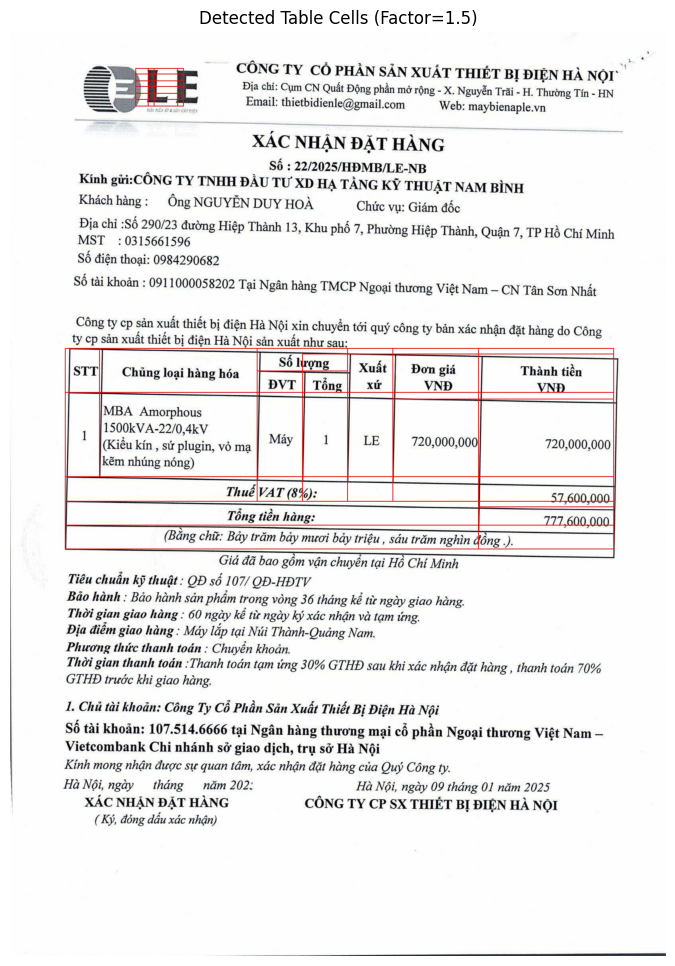

In [8]:
# Try with a different enhancement factor (1.5) for comparison
output_dir_alt = './output/table_extraction_alt'
table_data_alt, result_img_path_alt = extract_table(img_path, output_dir_alt, factor=1.5)

if result_img_path_alt and os.path.exists(result_img_path_alt):
    plt.figure(figsize=(12, 12))
    result_img_alt = cv2.imread(result_img_path_alt)
    result_img_rgb_alt = cv2.cvtColor(result_img_alt, cv2.COLOR_BGR2RGB)
    plt.imshow(result_img_rgb_alt)
    plt.title("Detected Table Cells (Factor=1.5)")
    plt.axis('off')
    plt.show()

## Examine Cell Images

Let's examine some of the extracted cell images:

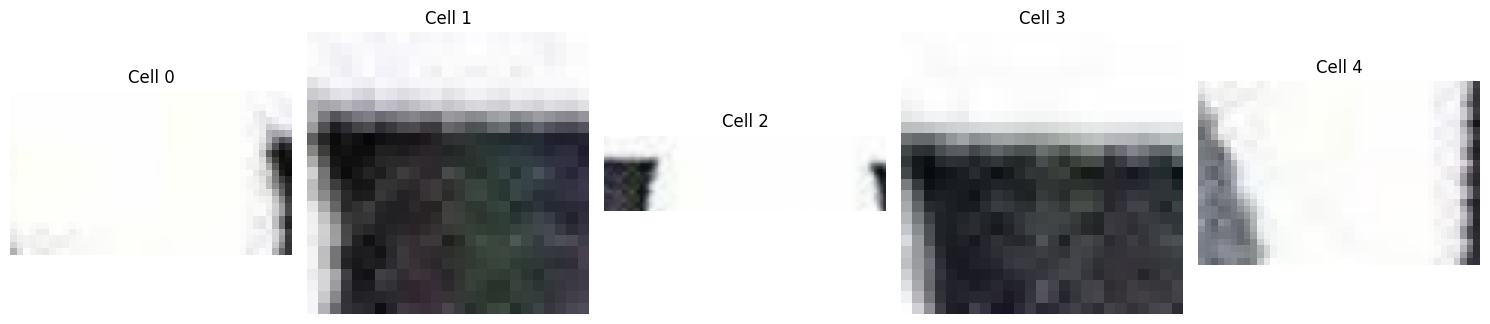

In [9]:
# Display a few cell images
def display_cell_images(output_dir, num_cells=5):
    plt.figure(figsize=(15, 10))
    for i in range(min(num_cells, len(table_data))):
        cell_img_path = os.path.join(output_dir, f"cell_{i}.png")
        if os.path.exists(cell_img_path):
            img = cv2.imread(cell_img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_cells, i+1)
            plt.imshow(img_rgb)
            plt.title(f"Cell {i}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

display_cell_images(output_dir)

## Testing PaddleOCR and VietOCR Individually

Let's test PaddleOCR and VietOCR individually to see how they perform:

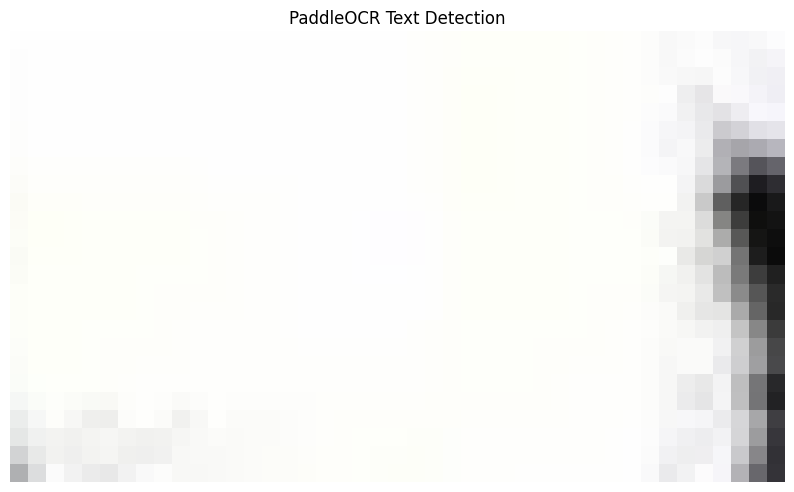

In [10]:
# Test PaddleOCR detection on a cell
cell_img_path = os.path.join(output_dir, "cell_0.png")
if os.path.exists(cell_img_path):
    # Detect text regions using PaddleOCR
    paddle_result = detector.ocr(cell_img_path, cls=False, det=True, rec=False)
    
    # Display results
    img = cv2.imread(cell_img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title("PaddleOCR Text Detection")
    
    if paddle_result and paddle_result[0]:
        for line in paddle_result[0]:
            # Draw bounding boxes
            pts = np.array(line, np.int32).reshape((-1, 1, 2))
            plt.plot([pts[0][0][0], pts[1][0][0], pts[2][0][0], pts[3][0][0], pts[0][0][0]], 
                     [pts[0][0][1], pts[1][0][1], pts[2][0][1], pts[3][0][1], pts[0][0][1]], 'r-')
    
    plt.axis('off')
    plt.show()

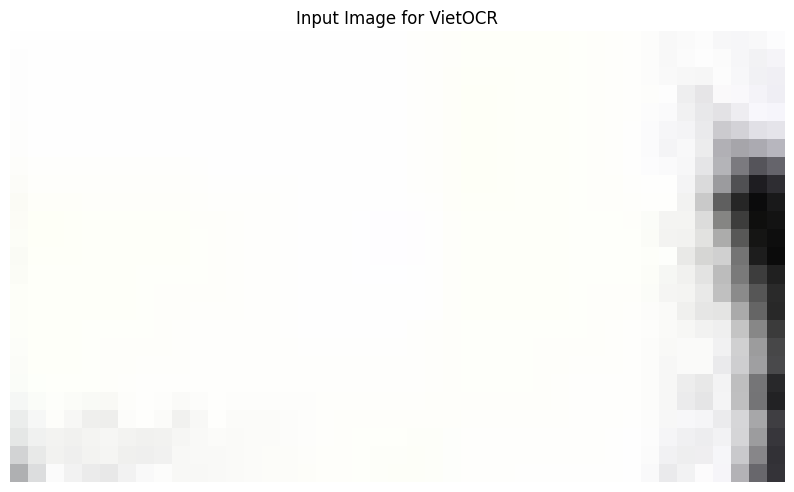

VietOCR result: 1


In [11]:
# Test VietOCR recognition on a cell
if os.path.exists(cell_img_path):
    # Load the cell image
    cell_pil = Image.open(cell_img_path)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(cell_pil)
    plt.title("Input Image for VietOCR")
    plt.axis('off')
    plt.show()
    
    # Recognize text using VietOCR
    try:
        text = recognitor.predict(cell_pil)
        print(f"VietOCR result: {text}")
    except Exception as e:
        print(f"Error with VietOCR: {e}")

## Conclusion

This notebook demonstrates a complete implementation that:
1. Uses OpenCV to detect table structures
2. Uses PaddleOCR to detect text regions within each cell
3. Uses VietOCR to recognize the text content

This approach leverages the strengths of each library - OpenCV for structural detection, PaddleOCR for text region detection, and VietOCR for accurate Vietnamese text recognition.

In [ ]:

import cv2
import numpy as np
from imutils import contours as cont
from collections import defaultdict
from PIL import ImageFont, ImageDraw, Image

class Line():
    def __init__(self, startx, starty, endx, endy):
        self.startx = startx
        self.starty = starty
        self.endx = endx
        self.endy = endy
        
    def __str__(self):
        return 'Line:{},{},{},{}'.format(self.startx, self.starty, self.endx, self.endy)
    def lenx(self):
        return abs(self.startx - self.endx)
    
    def leny(self):
        return abs(self.starty - self.endy)
    
    def toArray(self):
        return [self.startx, self.starty, self.endx, self.endy]

def reDrawLine(img, aleft, aright, same_len=True):
    w, h = img.shape[0], img.shape[1]
    for r in range(w-1):
        pixel_white = 0
        start = 0
        end = 0
        for c in range(h-1):
            if img[r,c] == 255:
                pixel_white += 1
            if img[r, c] == 0 and img[r,c+1] == 255:
                start = c
            if img[r, c] == 255 and img[r,c+1] == 0:
                end = c
        if pixel_white > 20:
            if same_len:
                img[r,aleft:aright] = 255
            else:
                img[r,start:end] = 255
    return img

def findMinMaxRow(v_img):
    aleft, aright = 0, 0
    list_col = []
    w, h = v_img.shape[0], v_img.shape[1]
    for r in range(w-1):
        pixel_white = 0
        for c in range(h-1):
            if v_img[r,c] == 255:
                pixel_white += 1
        if pixel_white > 20:
            list_col.append(r)
    aleft, aright = min(list_col), max(list_col)
    return aleft, aright

def getLines(img):
    lines = []
    w, h = img.shape[0], img.shape[1]
    for r in range(w-1):
        pixel_white = 0
        startx, starty, endx, endy = 0,0,0,0
        for c in range(h-1):
            if img[r,c] == 0 and img[r,c+1] == 255:
                startx = c
                starty = r
            if img[r,c] == 255 and img[r,c+1] == 0:
                endx = c
                endy = r
            if img[r,c] == 255:
                pixel_white += 1
        if pixel_white > 20:
            lines.append(Line(startx,starty,endx,endy))
            #print(Line(startx,starty,endx,endy).toArray())
    return lines

def findTable(arr):
    table = defaultdict(list)
    for i,b in enumerate(arr):
        if b[2] < b[3]/2:
            continue
        table[str(b[1])].append(b)
    #print(table)
    table = [i[1] for i in table.items()]# if len(i[1]) > 1]
    #print(([len(x) for x in table]))
    num_cols = max([len(x) for x in table])
    #print("num_cols:",num_cols)
    table = [i for i in table if len(i) == num_cols]
    #print("table rows=", len(table))
    #print("table cols=",num_cols)
    print("table size:{}x{}".format(len(table), num_cols))
    return table

def getTable(src_img, y_start=0, min_w=10, min_h=10):
    if y_start != 0:
        src_img = src_img[y_start:,:]
    if len(src_img.shape) == 2:
        gray_img = src_img
    elif len(src_img.shape) ==3:
        gray_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)

    thresh_img = cv2.adaptiveThreshold(~gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, -3)
    h_img = thresh_img.copy()
    v_img = thresh_img.copy()
    scale = 15

    h_size = int(h_img.shape[1]/scale)
    h_structure = cv2.getStructuringElement(cv2.MORPH_RECT,(h_size,1))

    h_erode_img = cv2.erode(h_img,h_structure,1)
    h_dilate_img = cv2.dilate(h_erode_img,h_structure,1)

    v_size = int(v_img.shape[0] / scale)
    v_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, v_size))
    v_erode_img = cv2.erode(v_img, v_structure, 1)
    v_dilate_img = cv2.dilate(v_erode_img, v_structure, 1)

    
    aleft, aright = findMinMaxRow(v_dilate_img.T)
    aleft2, aright2 = findMinMaxRow(h_dilate_img)

    h_dilate_img = reDrawLine(h_dilate_img, aleft, aright, True)
    #v_dilate_img = reDrawLine(v_dilate_img.T, aleft, aright, False).T
    #cv2.imshow('h_dilate_img',h_dilate_img)
    #cv2.imshow('h_dilate_img',v_dilate_img)
    #cv2.waitKey()
    #list_hlines = getLines(h_dilate_img)
    #list_vlines = getLines(v_dilate_img.T)
    #print(len(list_hlines))
    #print(len(list_vlines))
    #for i,_ in list_hlines:
    #    for j,_ in list_hlines
    #exit()
    #v_dilate_img = reDrawLine(v_dilate_img.T, aleft2, aright2, True).T
    v_dilate_img.T[aleft,aleft2:aright2] = 255
    v_dilate_img.T[aright,aleft2:aright2] = 255
    
    edges = cv2.Canny(h_dilate_img,50,150,apertureSize = 3) 
    #print(len(edges))

    # This returns an array of r and theta values 
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200) 
    #print(len(lines))
    #cv2.waitKey()
    mask_img = h_dilate_img + v_dilate_img
    joints_img = cv2.bitwise_and(h_dilate_img, v_dilate_img)
    #mask_img = 255 - mask_img
    #mask_img = unsharp_mask(mask_img)
    convolution_kernel = np.array(
                                [[0, 1, 0], 
                                [1, 2, 1], 
                                [0, 1, 0]]
                                )

    #mask_img = cv2.filter2D(mask_img, -1, convolution_kernel)
    #mask_img = 255- mask_img
    #cv2.imshow('mask', mask_img)
    #cv2.imshow('joints_img', joints_img)
    #cv2.waitKey()
    # cv2.imshow('join', joints_img)
    # cv2.waitKey()
    # fig, ax = plt.subplots(2,2)
    # fig.suptitle("table detect")
    # ax[0,0].imshow(h_dilate_img)
    # ax[0,1].imshow(v_dilate_img)
    # ax[1,0].imshow(mask_img)
    # ax[1,1].imshow(joints_img)
    # plt.show()cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE
    contours, _ = cv2.findContours(mask_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    (contours, boundingBoxes) = cont.sort_contours(contours, method="left-to-right")
    (contours, boundingBoxes) = cont.sort_contours(contours, method="top-to-bottom")

    table = findTable([cv2.boundingRect(x) for x in contours])
    
    # for r in table:
    #     for c in r:

    #         cv2.rectangle(src_img,(c[0], c[1]),(c[0] + c[2], c[1] + c[3]),(0, 0, 255), 1)
    #         cv2.putText(src_img, , (c[0] + c[2]//2,c[1] + c[3]//2), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0), 2)
    # for c in contours:
    #     x, y, w, h = cv2.boundingRect(c)
    #     if (w >= min_w and h >= min_h):
    #         #count += 1
    #         if count != 0:
    #             cv2.rectangle(src_img,(x, y),(x + w, y + h),(0, 0, 255), 1)
    #             list_cells.append([x,y,w,h])
    #             cv2.putText(src_img, str(count), (x+w//2,y+h//2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 2)
    #         count += 1
    #cv2.waitKey()
    #cv2.imwrite('a.jpg', src_img)
    return table#mask_img, joints_img

def getTextOfBox(img):
    return pytesseract.image_to_string(img, config='-l vie+en --oem 1 --psm 7').strip()#.lower()

def putTextUTF8(img, text, point, fsize=10):
    fontpath = "Roboto-Regular.ttf"
    font = ImageFont.truetype(fontpath, fsize)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(point, text, font = font, fill = ((0,0,0)))
    img = np.array(img_pil)
    return img

def getTableValue(table, img, img_ocr, fsize):
    #img_ocr = img.copy()
    #img_ocr = cv2.cvtColor(img_ocr,cv2.COLOR_BGR2GRAY)
    data = []
    header = []
    for i,row in enumerate(table):
        data_row = []
        for cell in row:
            crop = img_ocr[cell[1]+2:cell[1]+cell[3]-2, cell[0]+2:cell[0]+cell[2]-2]
            #cv2.imwrite(str(i)+".png",crop)
            cell_text = getTextOfBox(crop)
            if i == 0:
                header.append(cell_text)
                cv2.rectangle(img, (cell[0], cell[1]), (cell[0] + cell[2], cell[1] + cell[3]), (0,255,0), -1)
            else:
                cv2.rectangle(img, (cell[0], cell[1]), (cell[0] + cell[2], cell[1] + cell[3]), (0,255,255), -1)
                data_row.append(cell_text)
            img = putTextUTF8(img, cell_text, (cell[0],cell[1]), fsize)
        if i == 0:
            data.append(header)
        else:
            data.append(data_row)
    return data, img

img  = cv2.imread("input.jpg")
img2 = img.copy()

table = getTable(img)
data, img = getTableValue(table, img, img2, 10)
cv2.imwrite('recog.jpg', img)

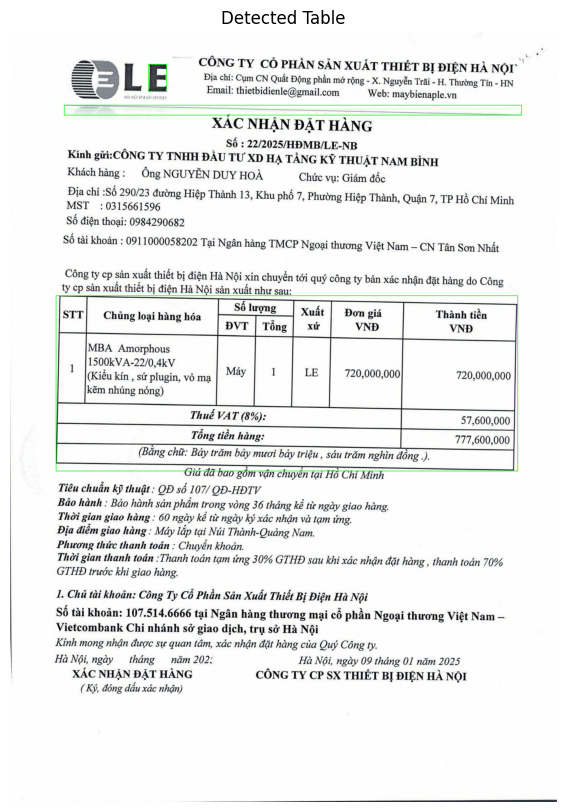

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc
image = cv2.imread('samples/XNDH.png')

# Chuyển ảnh sang grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng adaptive threshold để chuyển ảnh sang nhị phân
thresh = cv2.adaptiveThreshold(~gray, 255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 15, -2)

# Tách các đường dọc
vertical = thresh.copy()
vertical_size = vertical.shape[0] // 30  # bạn có thể điều chỉnh thông số này
vertical_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
vertical = cv2.erode(vertical, vertical_structure)
vertical = cv2.dilate(vertical, vertical_structure)

# Tách các đường ngang
horizontal = thresh.copy()
horizontal_size = horizontal.shape[1] // 30
horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
horizontal = cv2.erode(horizontal, horizontal_structure)
horizontal = cv2.dilate(horizontal, horizontal_structure)

# Tìm các điểm giao giữa các dòng và cột
mask = horizontal + vertical
joints = cv2.bitwise_and(horizontal, vertical)

# Tìm contours cho từng ô
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ contours lên ảnh gốc
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 50 and h > 20:  # lọc kích thước phù hợp của cell
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Hiển thị kết quả bằng matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Table")
plt.axis("off")
plt.show()

In [ ]:
from tabula import read_pdf
from tabulate import tabulate
file = "docs/XNDH.pdf"
df = read_pdf(file ,pages="all")
print(tabulate(df[0]))

[]
